# Загрузка данных в ноутбук

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../../Kaggle'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../../Kaggle/xxx_test.csv
../../Kaggle/xxx_train.csv
../../Kaggle/xxx_submission.csv


In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
%pylab inline
plt.style.use('seaborn-dark')
import warnings
warnings.filterwarnings("ignore") # отключение варнингов
pd.set_option('display.max_columns', None) # pd.options.display.max_columns = None 
# pd.set_option('display.max_rows', None) # не прятать столбцы при выводе дата-фреймов
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rc('font', size=14)

Populating the interactive namespace from numpy and matplotlib


In [94]:
train = pd.read_csv('../../Kaggle/xxx_train.csv')
test = pd.read_csv('../../Kaggle/xxx_test.csv')
# размеры данных
print(train.shape, test.shape)

(10000, 301) (50000, 300)


In [95]:
train.sample(5)

,X_0_0,X_0_1,X_0_2,X_1_0,X_1_1,X_1_2,X_2_0,X_2_1,X_2_2,X_3_0,X_3_1,X_3_2,X_4_0,X_4_1,X_4_2,X_5_0,X_5_1,X_5_2,X_6_0,X_6_1,X_6_2,X_7_0,X_7_1,X_7_2,X_8_0,X_8_1,X_8_2,X_9_0,X_9_1,X_9_2,X_10_0,X_10_1,X_10_2,X_11_0,X_11_1,X_11_2,X_12_0,X_12_1,X_12_2,X_13_0,X_13_1,X_13_2,X_14_0,X_14_1,X_14_2,X_15_0,X_15_1,X_15_2,X_16_0,X_16_1,X_16_2,X_17_0,X_17_1,X_17_2,X_18_0,X_18_1,X_18_2,X_19_0,X_19_1,X_19_2,X_20_0,X_20_1,X_20_2,X_21_0,X_21_1,X_21_2,X_22_0,X_22_1,X_22_2,X_23_0,X_23_1,X_23_2,X_24_0,X_24_1,X_24_2,X_25_0,X_25_1,X_25_2,X_26_0,X_26_1,X_26_2,X_27_0,X_27_1,X_27_2,X_28_0,X_28_1,X_28_2,X_29_0,X_29_1,X_29_2,X_30_0,X_30_1,X_30_2,X_31_0,X_31_1,X_31_2,X_32_0,X_32_1,X_32_2,X_33_0,X_33_1,X_33_2,X_34_0,X_34_1,X_34_2,X_35_0,X_35_1,X_35_2,X_36_0,X_36_1,X_36_2,X_37_0,X_37_1,X_37_2,X_38_0,X_38_1,X_38_2,X_39_0,X_39_1,X_39_2,X_40_0,X_40_1,X_40_2,X_41_0,X_41_1,X_41_2,X_42_0,X_42_1,X_42_2,X_43_0,X_43_1,X_43_2,X_44_0,X_44_1,X_44_2,X_45_0,X_45_1,X_45_2,X_46_0,X_46_1,X_46_2,X_47_0,X_47_1,X_47_2,X_48_0,X_48_1,X_48_2,X_49_0,X_49_1,X_49_2,X_50_0,X_50_1,X_50_2,X_51_0,X_51_1,X_51_2,X_52_0,X_52_1,X_52_2,X_53_0,X_53_1,X_53_2,X_54_0,X_54_1,X_54_2,X_55_0,X_55_1,X_55_2,X_56_0,X_56_1,X_56_2,X_57_0,X_57_1,X_57_2,X_58_0,X_58_1,X_58_2,X_59_0,X_59_1,X_59_2,X_60_0,X_60_1,X_60_2,X_61_0,X_61_1,X_61_2,X_62_0,X_62_1,X_62_2,X_63_0,X_63_1,X_63_2,X_64_0,X_64_1,X_64_2,X_65_0,X_65_1,X_65_2,X_66_0,X_66_1,X_66_2,X_67_0,X_67_1,X_67_2,X_68_0,X_68_1,X_68_2,X_69_0,X_69_1,X_69_2,X_70_0,X_70_1,X_70_2,X_71_0,X_71_1,X_71_2,X_72_0,X_72_1,X_72_2,X_73_0,X_73_1,X_73_2,X_74_0,X_74_1,X_74_2,X_75_0,X_75_1,X_75_2,X_76_0,X_76_1,X_76_2,X_77_0,X_77_1,X_77_2,X_78_0,X_78_1,X_78_2,X_79_0,X_79_1,X_79_2,X_80_0,X_80_1,X_80_2,X_81_0,X_81_1,X_81_2,X_82_0,X_82_1,X_82_2,X_83_0,X_83_1,X_83_2,X_84_0,X_84_1,X_84_2,X_85_0,X_85_1,X_85_2,X_86_0,X_86_1,X_86_2,X_87_0,X_87_1,X_87_2,X_88_0,X_88_1,X_88_2,X_89_0,X_89_1,X_89_2,X_90_0,X_90_1,X_90_2,X_91_0,X_91_1,X_91_2,X_92_0,X_92_1,X_92_2,X_93_0,X_93_1,X_93_2,X_94_0,X_94_1,X_94_2,X_95_0,X_95_1,X_95_2,X_96_0,X_96_1,X_96_2,X_97_0,X_97_1,X_97_2,X_98_0,X_98_1,X_98_2,X_99_0,X_99_1,X_99_2,y
1639,0.0,5.0,-1.00,3.0,53.0,1.27,1.0,2.0,0.00,2.0,-1.0,1.94,0.0,6.0,-1.00,3.0,66.0,1.27,0.0,3.0,-1.00,0.0,1.0,-1.00,3.0,70.0,1.94,3.0,51.0,2.03,3.0,51.0,2.47,0.0,4.0,-1.00,3.0,63.0,0.30,1.0,29.0,1.00,1.0,61.0,3.0,0.0,5.0,-1.00,1.0,36.0,0.00,0.0,5.0,-1.00,1.0,50.0,1.00,0.0,4.0,-1.00,0.0,5.0,-1.00,1.0,82.0,3.00,2.0,-1.0,1.76,2.0,-1.0,2.16,0.0,1.0,-1.0,2.0,-1.0,0.19,0.0,2.0,-1.00,1.0,62.0,1.00,3.0,55.0,1.77,1.0,92.0,1.00,1.0,50.0,2.00,1.0,95.0,1.00,3.0,79.0,2.67,1.0,8.0,2.00,1.0,17.0,0.00,2.0,-1.0,1.29,3.0,82.0,0.94,2.0,-1.0,2.45,3.0,95.0,1.68,0.0,3.0,-1.00,1.0,18.0,3.00,0.0,1.0,-1.00,2.0,-1.0,1.05,1.0,87.0,3.00,0.0,2.0,-1.00,1.0,86.0,0.00,3.0,96.0,0.09,0.0,3.0,-1.00,1.0,14.0,1.00,3.0,96.0,1.87,2.0,-1.0,2.26,0.0,2.0,-1.00,0.0,4.0,-1.00,2.0,-1.0,1.35,3.0,98.0,0.69,3.0,34.0,0.64,0.0,2.0,-1.00,2.0,-1.0,2.75,1.0,24.0,1.00,1.0,25.0,2.00,1.0,2.0,3.00,2.0,-1.0,2.08,1.0,72.0,3.00,3.0,96.0,0.57,1.0,68.0,1.00,1.0,32.0,0.00,1.0,18.0,3.00,1.0,82.0,2.00,0.0,4.0,-1.00,1.0,100.0,2.00,2.0,-1.0,0.19,2.0,-1.0,1.69,2.0,-1.0,2.33,0.0,4.0,-1.00,3.0,65.0,2.13,2.0,-1.0,1.94,1.0,91.0,1.00,3.0,6.0,0.74,3.0,75.0,2.23,3.0,99.0,0.16,0.0,4.0,-1.0,1.0,33.0,1.00,1.0,13.0,2.00,3.0,85.0,0.39,1.0,77.0,3.00,1.0,24.0,1.00,2.0,-1.0,2.10,0.0,5.0,-1.00,3.0,47.0,2.11,1.0,78.0,3.00,0.0,2.0,-1.00,0.0,4.0,-1.00,1.0,71.0,0.00,1.0,39.0,2.00,0.0,3.0,-1.0,0.0,2.0,-1.00,3.0,58.0,2.93,2.0,-1.0,0.81,3.0,98.0,0.85,2.0,-1.0,1.16,27.0
2861,0.0,5.0,-1.00,2.0,-1.0,1.57,1.0,66.0,0.00,1.0,27.0,1.00,3.0,53.0,2.61,2.0,-1.0,2.22,0.0,1.0,-1.00,2.0,-1.0,2.86,2.0,-1.0,2.75,1.0,25.0,3.00,2.0,-1.0,2.93,0.0,3.0,-1.00,0.0,6.0,-1.00,3.0,82.0,0.35,0.0,1.0,-1.0,1.0,86.0,2.00,0.0,1.0,-1.00,0.0,6.0,-1.00,3.0,54.0,0.06,1.0,83.0,1.00,0.0,3.0,-1.00,2.0,-1.0,0.91,2.0,-1.0,0.95,1.0,53.0,1.00,2.0,-1.0,0.7,1.0,20.0,3.00,1.0,1.0,3.00,3.0,59.0,2.49,3.0,33.0,0.56,0.0,6.0,-1.00,0.0,4.0,-1.00,0.0,5.0,-1.00,2.0,-1.0,0.92,3.0,31.0,1.48,0.0,4.0,-1.00,3.0,49.0,0.59,0.0,5.0,-1.00,1.0,

In [96]:
y = train.pop('y') # целевой вектор
train.shape, y.shape

((10000, 300), (10000,))

## Определение корелляции и линейная регрессия

In [7]:
import math

def average(x):
    assert len(x) > 0
    return float(sum(x)) / len(x)

def pearson_def(x, y):
    assert len(x) == len(y)
    n = len(x)
    assert n > 0
    avg_x = average(x)
    avg_y = average(y)
    diffprod = 0
    xdiff2 = 0
    ydiff2 = 0
    for idx in range(n):
        xdiff = x[idx] - avg_x
        ydiff = y[idx] - avg_y
        diffprod += xdiff * ydiff
        xdiff2 += xdiff * xdiff
        ydiff2 += ydiff * ydiff

    return diffprod / math.sqrt(xdiff2 * ydiff2)




In [8]:
train = pd.read_csv('../../Kaggle/xxx_train.csv')
test = pd.read_csv('../../Kaggle/xxx_test.csv')
# размеры данных
print(train.shape, test.shape)
mas = np.zeros((300))
mas1 = np.zeros((300))

for i in range(100):
    for j in range(3):
        z = np.array(train.pop('X_'+str(i)+'_'+str(j))).reshape((-1, 1))
        #z.reshape((-1, 1))
        #print(z.shape)
        
        model = LinearRegression().fit(z, y)
        ind = 3*i + j
        mas[ind] = model.coef_[0]
        l = np.array(z.reshape(-1, 1))[:,0]
        mas1[ind] = pearson_def(y, l) 
        #print(pearson_def(y, z))

(10000, 301) (50000, 300)


In [9]:
# Оценка Linear Regression
print(mas.mean())
print(mas.max())
print(mas.min())

0.1238284005018045
0.5602844394743567
-0.15733173517215798


In [10]:
# Оценка массива корелляций
print(mas1.mean())
print(mas1.max())
print(mas1.min())

0.028737402736976225
0.11170769522068383
-0.025597694710700513


In [11]:
for i in range(len(mas1)):
    if mas1[i] == 0:
        print(i)

## Получение рещультирующего вектора

In [136]:
tester = np.array(test)
print(tester.shape)

(50000, 300)


In [121]:
y = tester.dot(mas1)

In [122]:
print(y.shape)

(50000,)


# Алгоритмы машинного обучения

## Проверка методом KFold

In [12]:
from sklearn.model_selection import KFold

### Построение матрицы $M\in R^{n\_samples\times n\_features}$

In [16]:
Matrix = np.zeros((10000, 300))

for i in range(100):
    for j in range(3):
        ind = 3*i + j
        Matrix[:, ind] = np.array(train.pop('X_'+str(i)+'_'+str(j)))
        

In [19]:
print(Matrix.shape)
print(y.shape)

(10000, 300)
(10000,)


In [21]:
kf = KFold(n_splits=10)
#kf.split(Matrix, y)
for train_index, test_index in kf.split(Matrix, y):
    X_train, X_test = Matrix[train_index], Matrix[test_index]
    y_train, y_test = y[train_index], y[test_index]
    

#### Проверка моделей обучения

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier

__KNN__

In [25]:
knn = KNeighborsClassifier()
params_knn = {'n_neighbors': np.arange(1, 25)}
knn_gs = GridSearchCV(knn, params_knn, cv=5)
knn_gs.fit(X_train, y_train)

#save best model
knn_best = knn_gs.best_estimator_
print(knn_gs.best_params_)

{'n_neighbors': 23}


__Random Forest__

In [27]:
rf = RandomForestClassifier()
params_rf = {'n_estimators': [50, 100, 200]}
rf_gs = GridSearchCV(rf, params_rf, cv=5)
rf_gs.fit(X_train, y_train)

#save best model
rf_best = rf_gs.best_estimator_
print(rf_gs.best_params_)

{'n_estimators': 100}


__Logistic Regression__

In [29]:
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

__SGDClassifier__

In [31]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)

SGDClassifier()

__Gaussian__

In [40]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

__Ada Boost__

In [44]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

AdaBoostClassifier()

__Decision tree__

In [50]:
from sklearn import tree
tre = tree.DecisionTreeClassifier()
tre.fit(X_train, y_train)

DecisionTreeClassifier()

__Ансамбль моделей -- классификатор голосования__

In [54]:
estimators=[('knn', knn_best), ('rf', rf_best), ('log', log), ('ada', ada), ('dec', tre), ('gaus', model), ('sgd', sgd)]
ensemble = VotingClassifier(estimators, voting='hard')

__Проверка результатов__

In [55]:
ensemble.fit(X_train, y_train)
ensemble.score(X_test, y_test)

0.046

__Проверка точности предыдущих моделей__

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
def accuracy(model, X_test = X_test):
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [36]:
print("KNN " + str(accuracy(knn_best)))
print("RandomForest " + str(accuracy(rf_best)))
print("Logistic " + str(accuracy(log)))
print("SGD " + str(accuracy(sgd)))

KNN 0.053
RandomForest 0.072
Logistic 0.046
SGD 0.038


In [42]:
print("Gaussian " + str(accuracy(model)))

Gaussian 0.051


In [45]:
print("Ada " + str(accuracy(ada)))

Ada 0.065


In [51]:
print("DecTree " + str(accuracy(tre)))

DecTree 0.04


# Подход к задаче с точки зрения теории вероятностей

In [59]:
sigma = 6.87
mu = 18.3

In [ ]:
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
        np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
        linewidth=2, color='r')

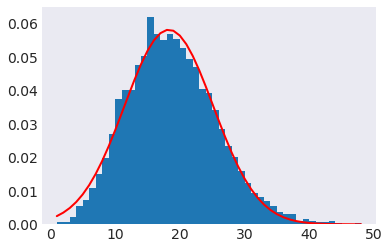

In [123]:
count, bins, ignored = plt.hist(y, 47, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
        np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
        linewidth=2, color='r')

Пусть $y_j(x) = \frac{1}{10000}\sum_{i = 1}^{10000}F_X(x[i])$, где $F_X(x)$ - функция распределения величины $X \sim N(18.3, 6.87^2)$

In [71]:
from scipy.special import erf

In [81]:
def F_X(x):
    add = erf((x-mu)/np.sqrt(2)*sigma)
    return 1/2 * (1+add)

In [92]:
def Y_Norm(X):
    ans = 0
    for i in range(len(X)):
        ans += F_X(X[i])
    ans /= 10000
    return ans

In [124]:
check_normal = np.zeros((300))
for i in range(300):
    check_normal[i] = Y_Norm(Matrix[:,i])

In [117]:
print(check_normal.shape)

(300,)


In [134]:
dif = (y - Matrix.dot(mas)).mean()
print(dif)
x = Matrix.dot(check_normal)
print(x)
print(y)

-29.16329088520334
[33440.0784986  41421.52724373 41723.76766797 ... 39552.88513586
 32645.67032386 30680.36151207]
0       19.0
1       25.0
2       22.0
3       22.0
4       24.0
        ... 
9995    14.0
9996     7.0
9997    18.0
9998     7.0
9999     9.0
Name: y, Length: 10000, dtype: float64


In [122]:
#count, bins, ignored = plt.hist(y, 47, density=True)
#plt.hist(mas, 47, density=True, color = 'g')
#plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
#        np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
#        linewidth=2, color='r')

## Проверка лучшей модели из sklearn

In [143]:
y_lol = sgd.predict(Matrix)
dif = np.sqrt(((y - y_lol)**2).mean())
print(dif)
y_ans = sgd.predict(tester)
print(y_ans.shape)
print(y_ans[0])

8.046968373244672
(50000,)
16.0


# Подготовка к отпарвке решения

## Проверка нулевого решения

In [106]:
y = np.zeros(50000)

## Сохранение ответа

In [140]:
# сохранить решение
pd.DataFrame({'id': np.arange(50000), 'y':y_ans}).to_csv('solution.csv', index=False)